In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
movies=pd.read_csv("movies.csv")

def repl(str1):
    return str1.replace('|',' ')    

movies.genres=movies.genres.apply(repl)

movierate=[0.0]*9742
movies=movies.assign(rating=movierate)

movies

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,0.0
1,2,Jumanji (1995),Adventure Children Fantasy,0.0
2,3,Grumpier Old Men (1995),Comedy Romance,0.0
3,4,Waiting to Exhale (1995),Comedy Drama Romance,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,0.0
9738,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,0.0
9739,193585,Flint (2017),Drama,0.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,0.0


In [3]:
ratings=pd.read_csv("ratings.csv")
del ratings['timestamp']
avg_ratings=ratings.groupby('movieId').mean()
avg_ratings.reset_index(inplace = True) 
del avg_ratings['userId']
avg_ratings

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [7]:
avg_ratings

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9737,193581,4.000000
9738,193583,3.500000
9739,193585,3.500000
9740,193587,3.500000


In [8]:
for i in range(0,len(movies)):
    movies.rating[i]=float(avg_ratings.rating[i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
genre_list=['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

ls2=[]
for x in genre_list:
    ls1=[]
    for i in range(0,9742):
        if x in movies.genres[i]:
            ls1.append(1)
        else:
            ls1.append(0)
    ls2.append(ls1)
    
for i in range(0,len(genre_list)):
    movies[genre_list[i]]=ls2[i]

In [22]:
movies

,title,genres,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.920930,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,pixar fun
2,Jumanji (1995),Adventure Children Fantasy,3.431818,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,fantasy magic board game Robin Williams game
3,Grumpier Old Men (1995),Comedy Romance,3.259615,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,moldy old
4,Waiting to Exhale (1995),Comedy Drama Romance,2.357143,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,
5,Father of the Bride Part II (1995),Comedy,3.071429,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,pregnancy remake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,4.000000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,
193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,3.500000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,
193585,Flint (2017),Drama,3.500000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,


In [11]:
movies=movies.set_index('movieId')

In [12]:
tags=pd.read_csv("movies1.csv",encoding='latin-1')
del tags['timestamp']
tags

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
...,...,...,...
3678,606,7382,for katie
3679,606,7936,austere
3680,610,3265,gun fu
3681,610,3265,heroic bloodshed


In [13]:
len(tags)

3683

In [14]:
tags=tags.drop_duplicates(['movieId','tag'])[['movieId','tag']]
tags=tags.dropna(how='any')

In [15]:
len(tags)

3579

In [16]:
tags=tags.reset_index(drop=True)

In [17]:
tags.isnull().values.any()

False

In [21]:
movies['tags']=['']*len(movies)

for i in range(0,len(tags)):
    movies.tags[tags.movieId[i]]=movies.tags[tags.movieId[i]]+tags.tag[i]+' '

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
movies

,title,genres,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.920930,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,pixar fun
2,Jumanji (1995),Adventure Children Fantasy,3.431818,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,fantasy magic board game Robin Williams game
3,Grumpier Old Men (1995),Comedy Romance,3.259615,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,moldy old
4,Waiting to Exhale (1995),Comedy Drama Romance,2.357143,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,
5,Father of the Bride Part II (1995),Comedy,3.071429,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,pregnancy remake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,4.000000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,
193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,3.500000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,
193585,Flint (2017),Drama,3.500000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,


In [ ]:
#////////////////////////

In [136]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [137]:
scaled_movies=scaler.fit_transform(movies[['rating', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']])

In [138]:
scaled_movies

array([[ 0.75491344, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [ 0.19925991, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [ 0.00362971, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [ 0.27671756, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [ 0.27671756,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [ 0.84474029, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [139]:
new_movies=pd.DataFrame(scaled_movies,columns=['rating', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'])

In [140]:
new_movies

,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.754913,-0.480607,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
1,0.199260,-0.480607,2.591019,-0.258679,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2,0.003630,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
3,-1.021620,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
4,-0.210159,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.844740,2.080702,-0.385949,3.865793,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9738,0.276718,-0.480607,-0.385949,3.865793,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9739,0.276718,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9740,0.276718,2.080702,-0.385949,3.865793,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


In [141]:
'''
kmeans=KMeans(n_clusters=4,init='kmeans++')

y=kmeans.fit_predict(new_movies[['rating', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western','Duration']])
movies['Cluster']=y

clus=list(movies.Cluster)
n_clus=[0,0,0,0]
for i in range(0,len(clus)):
    n_clus[clus[i]]+=1
    
n_clus
'''

"\nkmeans=KMeans(n_clusters=4,init='kmeans++')\n\ny=kmeans.fit_predict(new_movies[['rating', 'Action', 'Adventure',\n       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',\n       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',\n       'Sci-Fi', 'Thriller', 'War', 'Western','Duration']])\nmovies['Cluster']=y\n\nclus=list(movies.Cluster)\nn_clus=[0,0,0,0]\nfor i in range(0,len(clus)):\n    n_clus[clus[i]]+=1\n    \nn_clus\n"

In [142]:
inertias=[]
for k in range(1,41):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit_transform(new_movies[['rating', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']])
    inertias.append(kmeans.inertia_)

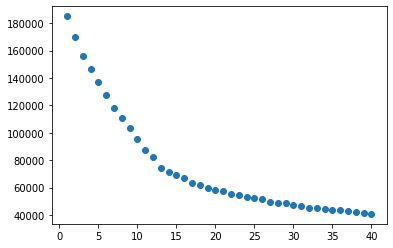

In [143]:
plt.scatter(range(1,41),inertias)
plt.show()

In [144]:
#///////////////////////////////

SyntaxError: invalid syntax (<ipython-input-144-a5838e5685b4>, line 1)